In [125]:
from clean_df import CleanDataframe
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [73]:
#Find the outliers

def outlier_bound(df):
    bounds={}
    for col in cols_numeric:
        q1=df[col].quantile(0.05)  #0.05
        q3=df[col].quantile(0.95)   #0.95
        lower_b=q1-(1.5*(q3-q1))
        upper_b=q3+(1.5*(q3-q1))
        bounds[col]=[lower_b,upper_b]
    return bounds

In [5]:
#Replace the outliers with mean value This helps with the computational analysis.
def outlier_remove(df):
    bounds=outlier_bound(df)
    for col in cols_numeric:
        mean_use=df[col][(df[col] > bounds[col][0]) & (df[col] < bounds[col][1])].mean()
        df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),mean_use,inplace=True)
    return df

In [131]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytes of that value

        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values

        Returns:
        --------
        A series
    """
    megabyte = 1 * 10e+5
    df[bytes_data] = df[bytes_data] / megabyte

    return df

In [6]:
df_original = pd.read_excel('Week1_challenge_data_source.xlsx',
                            dtype={'Bearer Id': str, 'IMSI': str,'MSISDN/Number': str, 'IMEI': str,
                                  'Handset Manufacturer':str,'Handset Type':str}, engine='openpyxl')

In [142]:
df=df_original.copy(deep=True)

In [134]:
cleaning_df=CleanDataframe(df)

In [135]:
print(df.shape)
df.head()

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,33664962239,35521209507511,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [136]:
df.describe()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,100.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,70.000000,15.000000,19710.750000,1120.000000,3.768308e+06,8.402025e+04,100.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


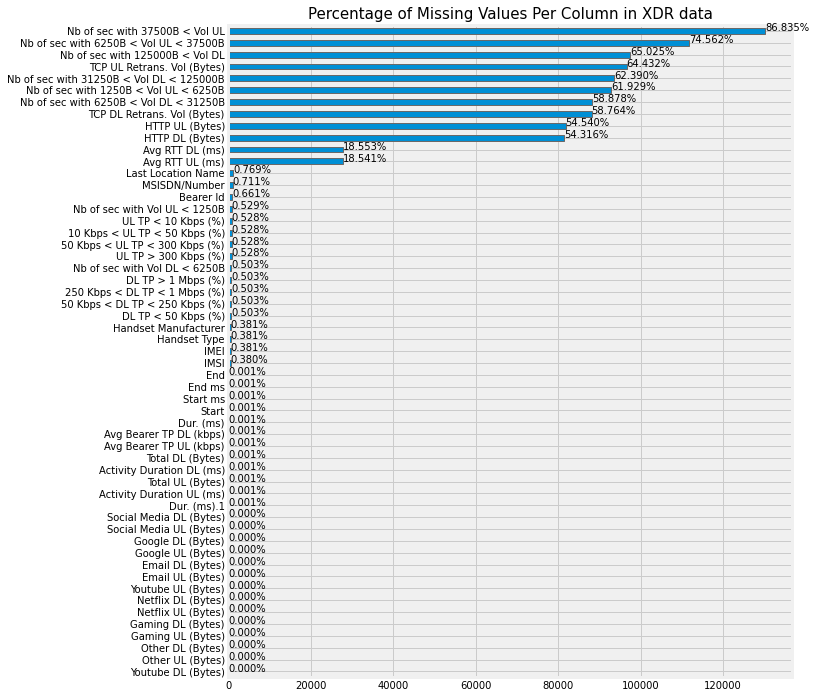

In [137]:
cleaning_df.check_missing_values()

In [141]:
bytes_data = ['Total UL (Bytes)', 'Total DL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
              'Netflix DL (Bytes)','Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
              'Other DL (Bytes)','Other UL (Bytes)']

In [143]:
# !! Run it once
df=convert_bytes_to_megabytes(df,bytes_data)

In [144]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,33664962239,35521209507511,9164566995485190,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,208202201200072,33650688697,35483109451938,D20434A,...,16.191667,11.763428,17.883703,19.678161,526.609673,9.197207,3.264510,13.487416,57.628851,574.175259
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,208201908153249,33663449963,35660508296467,D10223C,...,13.877234,8.288284,19.350146,21.293148,626.893062,4.735033,712.180387,2.457758,39.135081,666.648844
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,208201711161187,33621890103,35721209870907,T51102A,...,22.660510,1.855903,9.963942,5.065760,553.539484,13.394316,121.100856,11.314729,34.912224,592.786405
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,208202101098075,33619622058,86186204011457,L88342B,...,8.817106,8.305402,3.322253,13.172589,352.536971,2.529475,814.713113,1.406930,29.626096,371.895920


**Remove columns with >25% Missing values**

In [145]:
def removeMissingvalues(df:pd.DataFrame)-> pd.DataFrame:
    missing_ratio = df.isna().sum()/df.shape[0]

    # Below code gives list of columns having more than 25% nan
    col_to_drop = missing_ratio[missing_ratio>0.25].keys()

    df.drop(col_to_drop, axis=1,inplace=True)
    
    return df

In [146]:
df=removeMissingvalues(df)

In [147]:
df.dropna(how='all',subset=['IMEI','IMSI','MSISDN/Number'],inplace=True)

In [148]:
df.shape

(149431, 45)

In [149]:
df.isna().sum()

Bearer Id                           430
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                       496
IMEI                                  2
Last Location Name                  592
Avg RTT DL (ms)                   27693
Avg RTT UL (ms)                   27675
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 724
50 Kbps < DL TP < 250 Kbps (%)      724
250 Kbps < DL TP < 1 Mbps (%)       724
DL TP > 1 Mbps (%)                  724
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [150]:
df.dtypes

Bearer Id                                 object
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                      object
MSISDN/Number                             object
IMEI                                      object
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

In [151]:
# separating columns based on datatypes
cols_numeric=df.columns.difference(['Bearer Id','Start','End','IMSI','MSISDN/Number','IMEI','Last Location Name',
                                    'Handset Manufacturer','Handset Type']).to_list()
cols_cat=['Handset Manufacturer','Handset Type']

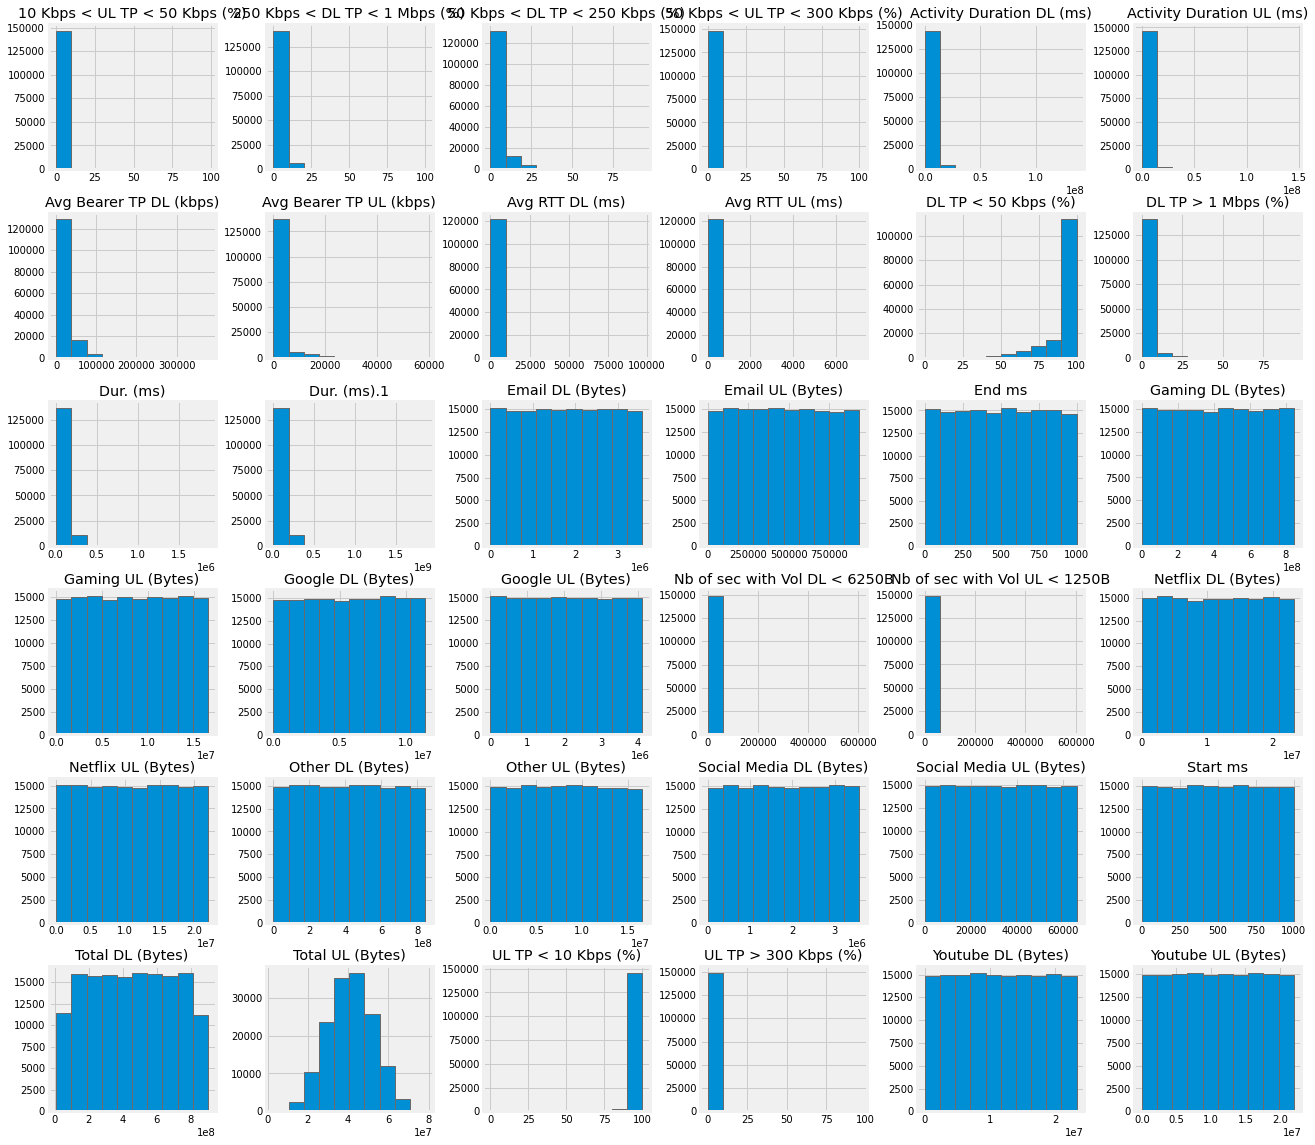

In [27]:
#Distribution of numeric variables
_=df[cols_numeric].hist(figsize=(20,20))

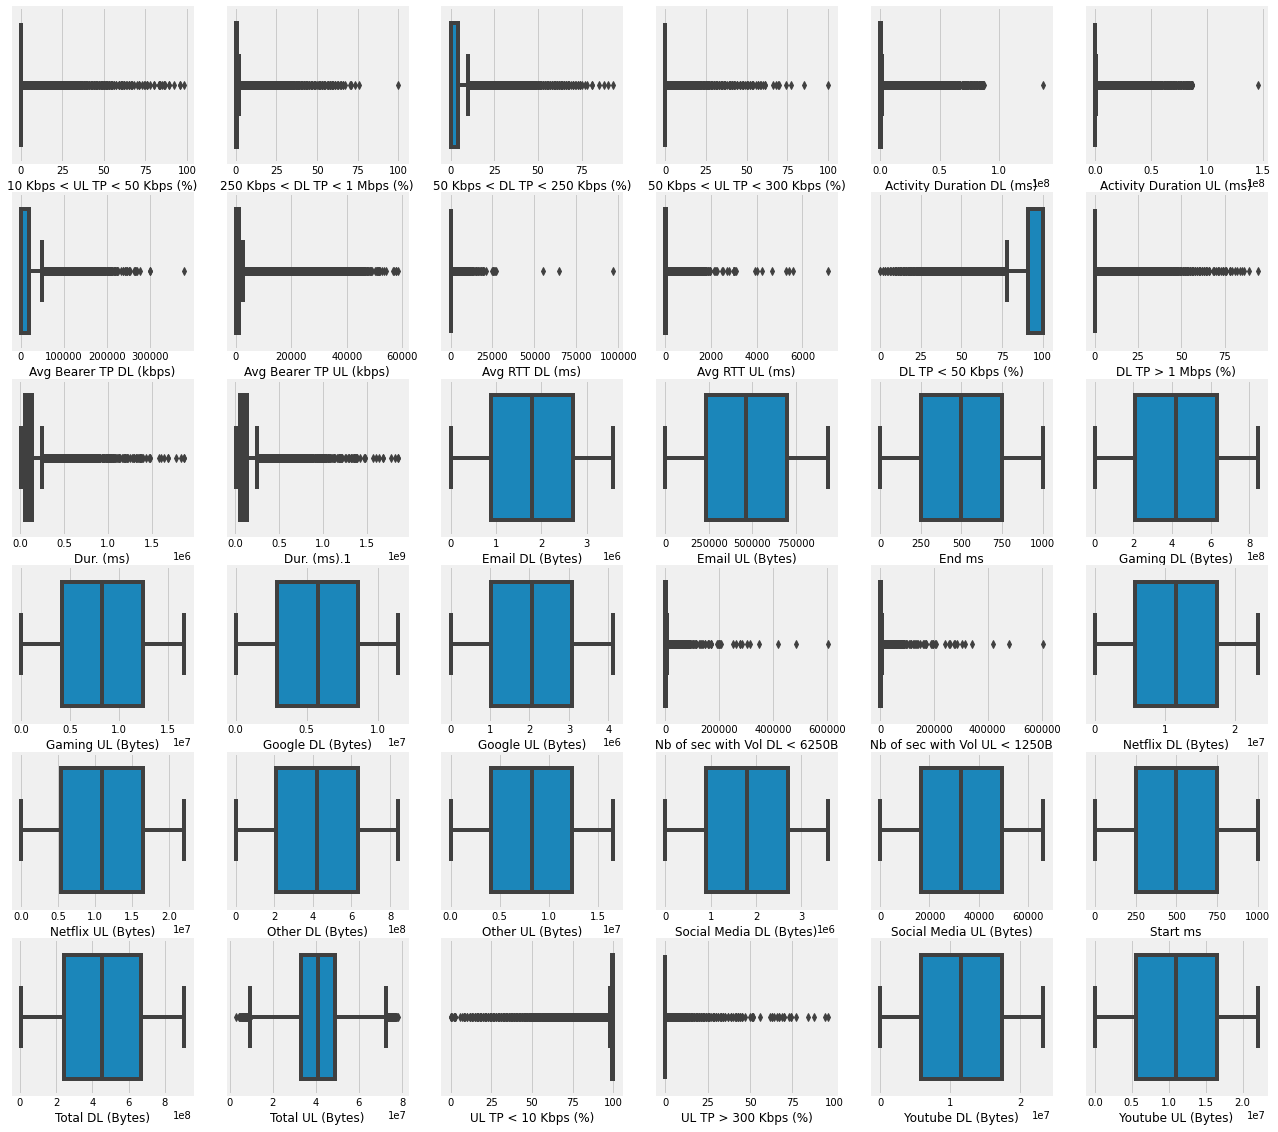

In [32]:
fig, axs = plt.subplots(6, 6,figsize=(20,20))
axe = axs.ravel()
for i, var in enumerate(cols_numeric):
    sns.boxplot(x=var,data=df,ax=axe[i])

In [155]:
df=outlier_remove(df)

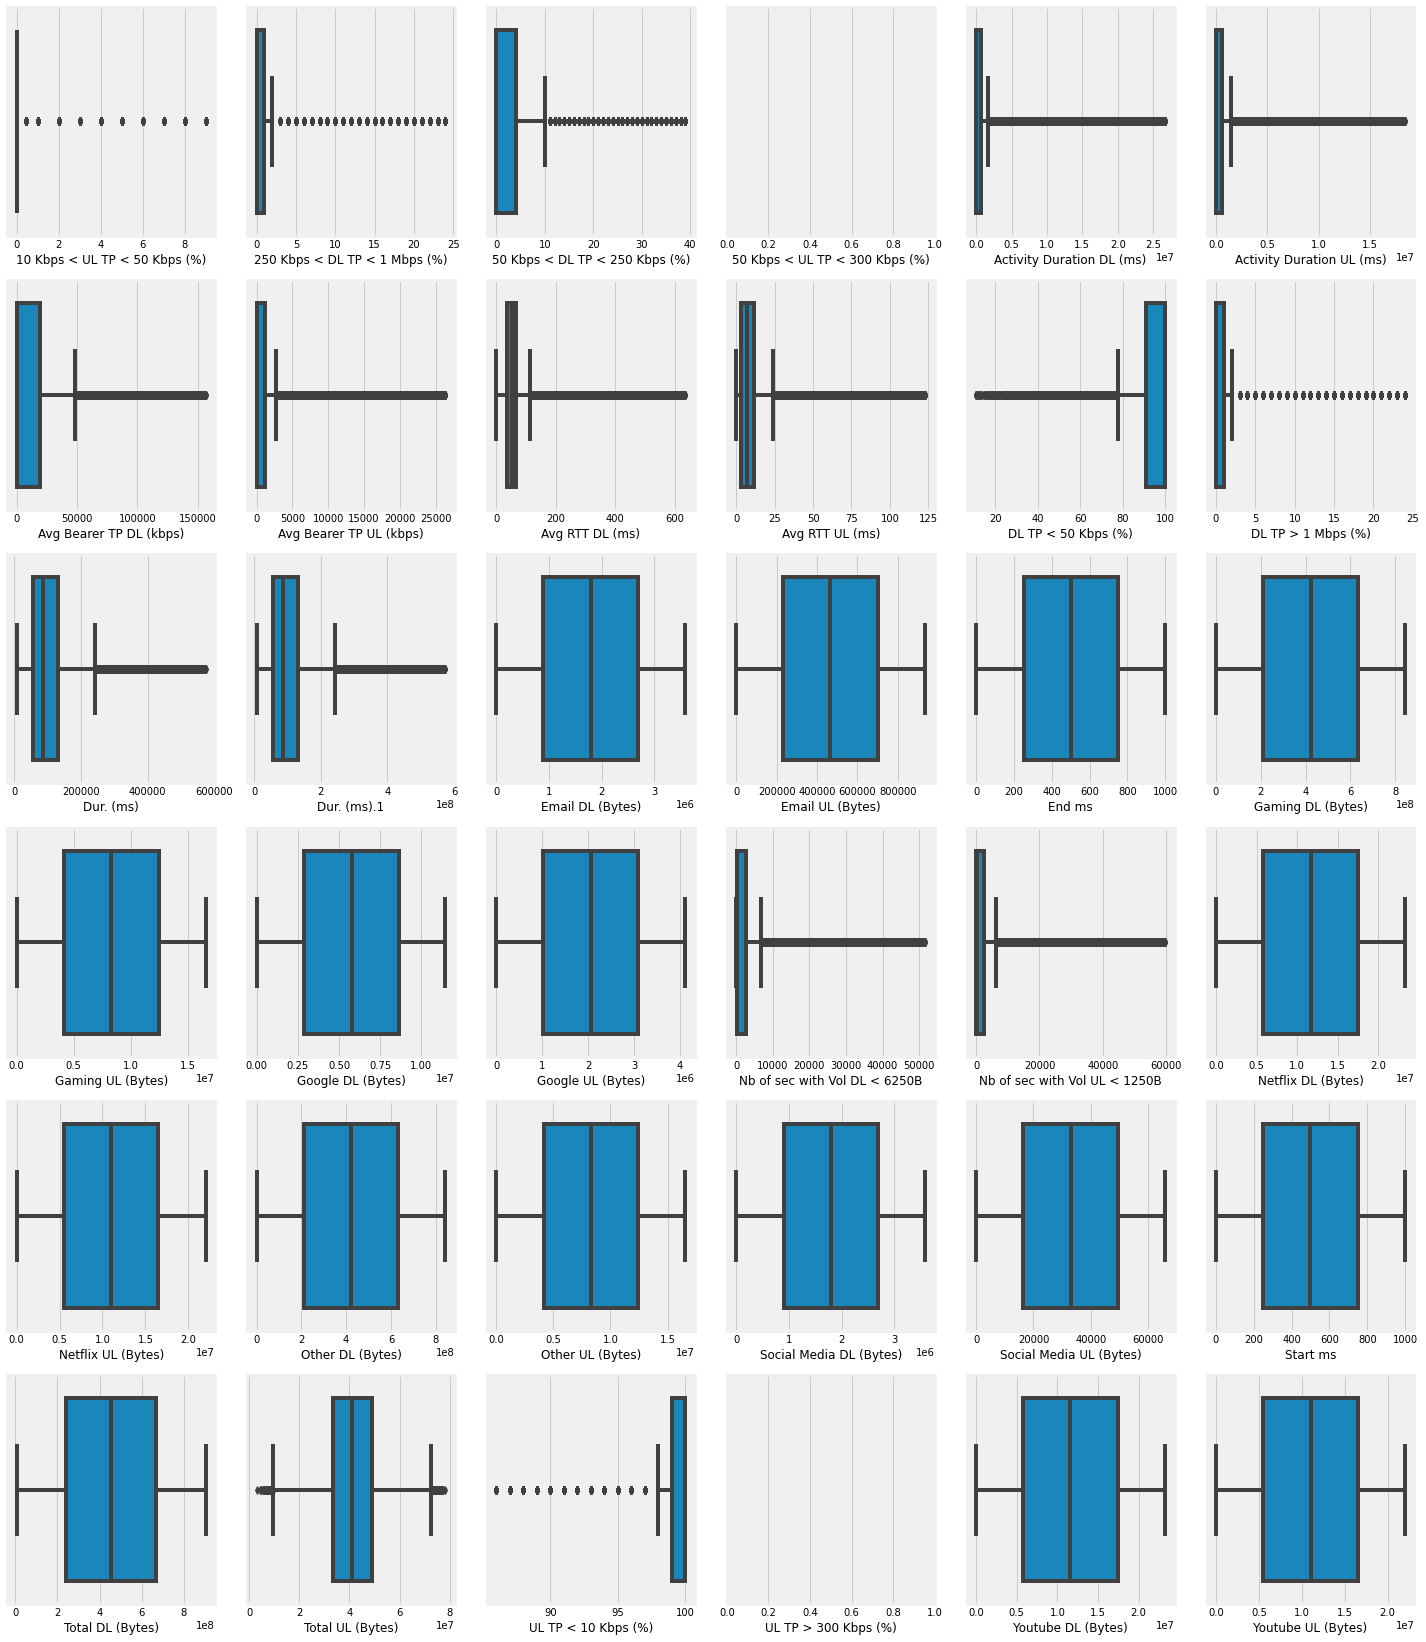

In [48]:
fig, axs = plt.subplots(6, 6,figsize=(20,23))
axe = axs.ravel()
for i, var in enumerate(cols_numeric):
    sns.boxplot(x=var,data=df,ax=axe[i])
    fig.tight_layout(pad=1.4)

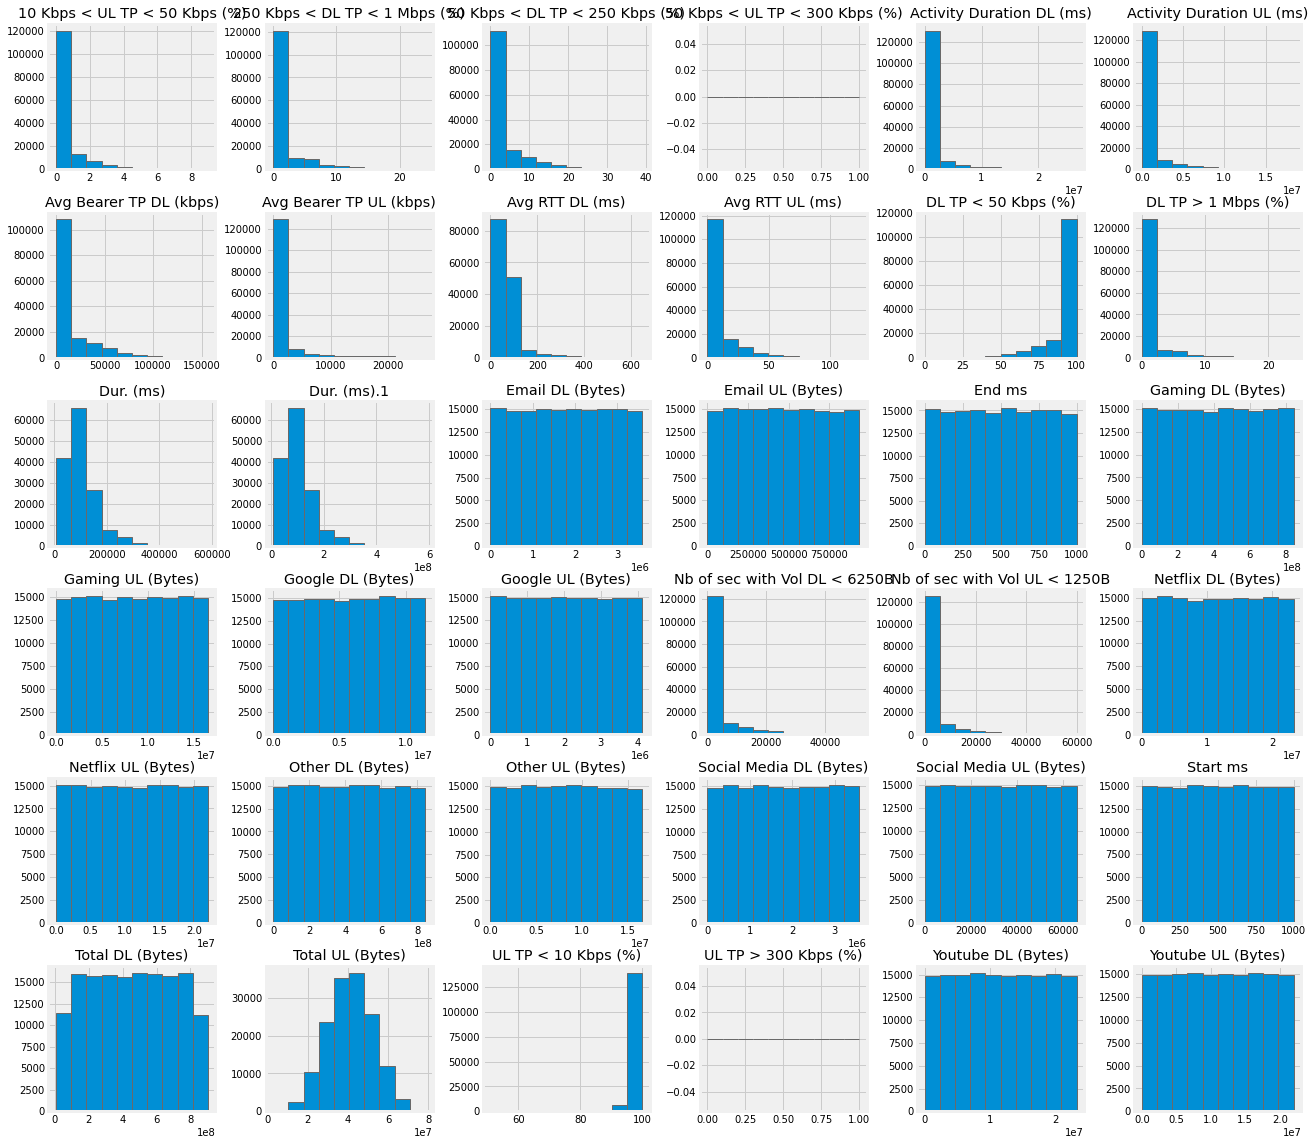

In [34]:
_=df[cols_numeric].hist(figsize=(20,20))

In [156]:
print('Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted ad <-1 skewed to negative')
df.skew(axis=0,numeric_only=True)

Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted ad <-1 skewed to negative


Start ms                          0.001031
End ms                           -0.000927
Dur. (ms)                         1.858754
Avg RTT DL (ms)                   4.289467
Avg RTT UL (ms)                   3.212580
Avg Bearer TP DL (kbps)           2.211565
Avg Bearer TP UL (kbps)           3.705969
DL TP < 50 Kbps (%)              -2.282045
50 Kbps < DL TP < 250 Kbps (%)    2.598542
250 Kbps < DL TP < 1 Mbps (%)     3.000316
DL TP > 1 Mbps (%)                3.690709
UL TP < 10 Kbps (%)              -3.101627
10 Kbps < UL TP < 50 Kbps (%)     3.663948
50 Kbps < UL TP < 300 Kbps (%)         NaN
UL TP > 300 Kbps (%)                   NaN
Activity Duration DL (ms)         3.936986
Activity Duration UL (ms)         3.891640
Dur. (ms).1                       1.858753
Nb of sec with Vol DL < 6250B     3.084690
Nb of sec with Vol UL < 1250B     3.313068
Social Media DL (Bytes)          -0.001955
Social Media UL (Bytes)          -0.000098
Google DL (Bytes)                -0.008221
Google UL (

In [157]:
# remove two columns that are dominantly zero
df.drop(['50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)'],axis=1,inplace=True)

In [158]:
cols_numeric.remove('UL TP > 300 Kbps (%)')
cols_numeric.remove('50 Kbps < UL TP < 300 Kbps (%)')

In [159]:
#Filling in missing values using mean value or median value depending on the previous histogram and skeweness

for col in cols_numeric:
    if df[col].skew() >=1 or df[col].skew() <=-1:
        df[col]=df[col].fillna(df[col].median())
    else:
        df[col]=df[col].fillna(df[col].median())
        
df[cols_cat]=df[cols_cat].fillna('Undefined')

In [160]:
df.isna().sum()

Bearer Id                         430
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (ms)                           0
IMSI                                0
MSISDN/Number                     496
IMEI                                2
Last Location Name                592
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Dur. (ms).1                         0
Handset Manufacturer                0
Handset Type                        0
Nb of sec with Vol DL < 6250B       0
Nb of sec wi

**Drop Duplicates**

In [82]:
# df[df.duplicated(subset=['Bearer Id','IMSI','IMEI','MSISDN/Number'],keep=False)].sort_values(by='Bearer Id')
# df.drop_duplicates(subset=['Bearer Id','IMSI'],keep='first',inplace=True,ignore_index=True)

In [91]:
df['Handset Manufacturer'] = df['Handset Manufacturer'].astype('str',errors='ignore').str.capitalize()
df['Handset Type'] = df['Handset Type'].astype('str',errors='ignore').str.capitalize()

#### Top 10 handsets used by the customers and  Top 3 handset manufacturers

In [92]:
plt.style.use('seaborn-dark-palette')

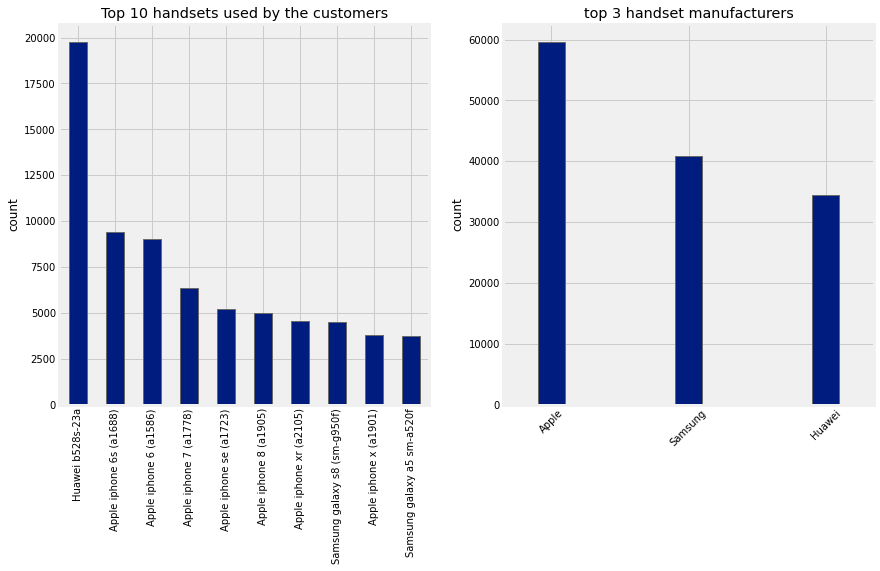

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
_ = df.query('`Handset Type`!="Undefined"')['Handset Type'].value_counts()[:10].plot(kind='bar', ylabel='count', rot=90,
                                                                                     ax=axs[0],
                                                                                     title='Top 10 handsets used by '
                                                                                           'the customers')
_ = df.query('`Handset Manufacturer`!="Undefined"')['Handset Manufacturer'].value_counts()[:3].plot(kind='bar',ylabel='count',rot=45,width=0.2,
                                                                            ax=axs[1],title='top 3 handset manufacturers')

#### top 5 handsets per top 3 handset manufacturer

In [94]:
df_manfact_goup=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung"\
                           or `Handset Manufacturer`=="Huawei"')

In [95]:
df_manfact_goup=df_manfact_goup.groupby(['Handset Manufacturer','Handset Type']).aggregate({'Handset Type':'count'})
pd.DataFrame(df_manfact_goup['Handset Type'].groupby('Handset Manufacturer',group_keys=False).nlargest(5))

Handset Type
Handset Manufacturer Handset Type                                
Apple                Apple iphone 6s (a1688)                 9419
                     Apple iphone 6 (a1586)                  9023
                     Apple iphone 7 (a1778)                  6326
                     Apple iphone se (a1723)                 5187
                     Apple iphone 8 (a1905)                  4993
Huawei               Huawei b528s-23a                       19752
                     Huawei e5180                            2079
                     Huawei p20 lite huawei nova 3e          2021
                     Huawei p20                              1480
                     Huawei y6 2018                           997
Samsung              Samsung galaxy s8 (sm-g950f)            4520
                     Samsung galaxy a5 sm-a520f              3724
                     Samsung galaxy j5 (sm-j530)             3696
                     Samsung galaxy j3 (sm-j330)             3484
                     Samsung galaxy s7 (sm-g930x)            3199

In [163]:
# df.groupby('MSISDN/Number').aggregate({'Bearer Id':'count','Total UL (Bytes)':'sum',
#                               'Total DL (Bytes)':'sum'}).sort_values(by='Bearer Id',ascending=False)

In [179]:
df_grouped_bytesdata=df.groupby('IMSI').aggregate({'Bearer Id': 'count', 'Total UL (Bytes)': 'sum',
                              'Total DL (Bytes)': 'sum', 'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
                              'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum', 'Gaming DL (Bytes)': 'sum',
                              'Gaming UL (Bytes)': 'sum','Other DL (Bytes)':'sum','Other UL (Bytes)':'sum',
                            'MSISDN/Number':'nunique','IMEI':'nunique','Handset Manufacturer':'unique'}).sort_values(by='Bearer Id', ascending=False)
df_grouped_bytesdata

,Bearer Id,Total UL (Bytes),Total DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),MSISDN/Number,IMEI,Handset Manufacturer
IMSI,,,,,,,,,,,,,,
208201402778052,18,669.650721,7301.516540,164.048706,210.434341,199.479238,129.246502,6745.733519,141.838597,8025.476831,142.400945,1,1,[Samsung]
208201715944176,17,689.483001,8156.743493,199.823443,194.546775,179.585986,181.815060,7622.035401,127.396833,7495.297541,143.966031,1,1,[Samsung]
208201007176097,17,729.577380,7770.043342,237.883033,215.075736,193.912238,163.068369,7171.883799,154.789688,6201.652608,152.930478,1,1,[Samsung]
208201906760163,16,624.260321,7081.602462,119.658146,138.332942,196.277206,203.241873,6609.900470,115.658741,6182.550577,134.864910,1,1,[Huawei]
208202100881019,15,703.478581,7811.295382,194.068298,202.220900,146.500839,188.142430,7316.364172,144.681056,4590.038280,126.096213,1,1,[Samsung]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208201545190143,0,45.142931,587.378322,15.024089,5.458119,15.959307,21.857833,549.854429,10.694649,99.615939,5.001863,1,1,[Apple]
208201907837163,0,20.015468,32.929145,11.353620,5.723417,5.567228,8.027681,4.613538,1.090631,396.238035,1.072509,1,1,[Samsung]
208200802533205,0,24.241141,379.264125,3.628081,2.446340,19.747414,10.634569,351.451858,3.929212,28.694178,4.209746,1,1,[Samsung]


In [180]:
df_grouped_bytesdata.describe()

,Bearer Id,Total UL (Bytes),Total DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),MSISDN/Number,IMEI
count,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000
mean,1.389092,57.284993,633.370609,16.205389,15.337623,16.196397,15.325393,587.959879,11.548059,586.690395,11.512034,0.996187,1.000047
std,0.809545,35.642660,464.372162,12.319253,11.593250,12.314313,11.606220,443.851520,8.729595,443.688125,8.703473,0.061783,0.009160
min,0.000000,2.866892,8.827082,0.000053,0.000106,0.000042,0.000035,0.002516,0.000059,0.003290,0.000156,0.000000,0.000000
25%,1.000000,36.392513,314.803069,7.641030,7.243533,7.585021,7.204045,279.237002,5.443850,276.658777,5.459190,1.000000,1.000000
50%,1.000000,46.780498,570.062811,14.595242,13.865169,14.630597,13.874520,532.202932,10.441812,529.661032,10.373834,1.000000,1.000000
75%,2.000000,65.658420,807.067303,21.119127,19.970034,21.125936,20.005364,766.715575,15.076961,765.070420,15.022813,1.000000,1.000000
max,18.000000,729.577380,8156.743493,237.883033,215.075736,199.479238,203.241873,7622.035401,154.789688,8025.476831,152.930478,2.000000,2.000000


In [181]:
df_grouped_bytesdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107265 entries, 208201402778052 to 208201546339094
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Bearer Id             107265 non-null  int64  
 1   Total UL (Bytes)      107265 non-null  float64
 2   Total DL (Bytes)      107265 non-null  float64
 3   Youtube DL (Bytes)    107265 non-null  float64
 4   Youtube UL (Bytes)    107265 non-null  float64
 5   Netflix DL (Bytes)    107265 non-null  float64
 6   Netflix UL (Bytes)    107265 non-null  float64
 7   Gaming DL (Bytes)     107265 non-null  float64
 8   Gaming UL (Bytes)     107265 non-null  float64
 9   Other DL (Bytes)      107265 non-null  float64
 10  Other UL (Bytes)      107265 non-null  float64
 11  MSISDN/Number         107265 non-null  int64  
 12  IMEI                  107265 non-null  int64  
 13  Handset Manufacturer  107265 non-null  object 
dtypes: float64(10), int64(3), object(1